# Logistic Regression

Author: Nandini Sah

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [83]:
data = pd.read_csv("titanic.csv", index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [84]:
data.info() # what type of data is present in the data set

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Pre-processing of the dataset

In [85]:
data.nunique() # Columns with What no. of unique Values

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [86]:
data['Embarked'].value_counts() # if one value would have dominated the column, dropping the column would have been appropriate

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [87]:
data = data.drop(['Name', 'Ticket'], axis=1)  # too many unique values
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [88]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [89]:
# Since Cabin has almost 80% of the column empty, so droppping the column would be feasible since it poses close to no affect on the prediction

data = data.drop(['Cabin'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [90]:
test_data = data.sample(n=179, random_state=42)
train_data = data.drop(test_data.index)

In [91]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [92]:
def one_hot_encode(X):
    X = pd.get_dummies(X, columns=['Parch', 'Sex', 'Embarked', 'Pclass', 'SibSp'], drop_first=True)
    X = X.astype(np.float64)
    return X

In [93]:
train_data = one_hot_encode(X=train_data)
test_data = one_hot_encode(X=test_data)

In [94]:
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  

extra_cols = set(test_data.columns) - set(train_data.columns)
test_data.drop(columns=extra_cols, inplace=True)

test_data = test_data[train_data.columns]

In [95]:
train_data.head()

,Survived,Age,Fare,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,38.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,26.0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,35.0,53.1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,35.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
test_data.head()

,Survived,Age,Fare,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
PassengerId,,,,,,,,,,,,,,,,,,,,
710,1.0,29.0,15.2458,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
440,0.0,31.0,10.5000,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
841,0.0,20.0,7.9250,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
721,1.0,6.0,33.0000,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
40,1.0,14.0,11.2417,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    float64
 1   Age         712 non-null    float64
 2   Fare        712 non-null    float64
 3   Parch_1     712 non-null    float64
 4   Parch_2     712 non-null    float64
 5   Parch_3     712 non-null    float64
 6   Parch_4     712 non-null    float64
 7   Parch_5     712 non-null    float64
 8   Parch_6     712 non-null    float64
 9   Sex_male    712 non-null    float64
 10  Embarked_Q  712 non-null    float64
 11  Embarked_S  712 non-null    float64
 12  Pclass_2    712 non-null    float64
 13  Pclass_3    712 non-null    float64
 14  SibSp_1     712 non-null    float64
 15  SibSp_2     712 non-null    float64
 16  SibSp_3     712 non-null    float64
 17  SibSp_4     712 non-null    float64
 18  SibSp_5     712 non-null    float64
 19  SibSp_8     712 non-null    float6

In [98]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

## Standarization

In [99]:
def zscore_normalize (X, mean=None, std=None, columns_to_scale=['Age', 'Fare']):
    if mean is None and std is None:
        mean = X[columns_to_scale].mean(axis=0)
        std = X[columns_to_scale].std(axis=0)
    
    # Standardize only the specified columns
    X[columns_to_scale] = (X[columns_to_scale] - mean) / std
    return X, mean, std

In [100]:
X_train, mean, std = zscore_normalize(X_train)
X_test, _, _ = zscore_normalize(X_test, mean, std)

In [101]:
X_train

,Age,Fare,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
PassengerId,,,,,,,,,,,,,,,,,,,
1,-0.553824,-0.487522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.676191,0.744610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.246320,-0.474533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.445563,0.394726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.445563,-0.472128,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.092569,-0.424985,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
885,-0.323196,-0.491370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,-0.784452,-0.049765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training of the Model

### Code

In [102]:
class Logistic_Regression:
    def __init__(self, learning_rate=0.01, num_iterations=100, reg_lambda=0.01) :
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = 0
        self.reg_lambda = reg_lambda
        self.loss_history=[]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logloss(self, h, y):
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):

        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        n_features = X.shape[1]
        self.weights = np.zeros(n_features, dtype=np.float64)
         
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            
            h = self.sigmoid(z)
            
            weight_gradient = np.dot(X.T, (h - y)) / y.size + self.reg_lambda * self.weights
            bias_gradient = np.mean(h-y)
            
            self.weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient

            loss = self.logloss(h, y)
            self.loss_history.append(loss)
            
            if i % 100 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X, threshold=0.4):
        return self.predict_proba(X) >= threshold
    
    def score(self, X, y):
        predictions = self.predict(X)
        return (predictions == y).mean()


### Training 

In [103]:
model = Logistic_Regression(learning_rate=0.1, num_iterations=200, reg_lambda=0.005)

In [104]:
model.fit(X_train, y_train)

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.5281399092454016


## Checking the performance

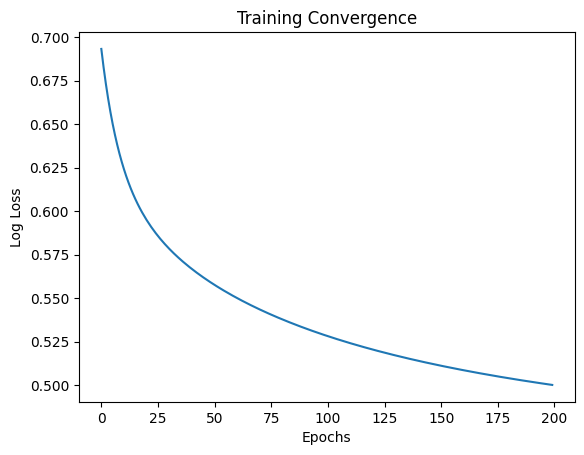

In [105]:
plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training Convergence")
plt.show()

In [106]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7837
Test Accuracy: 0.7989


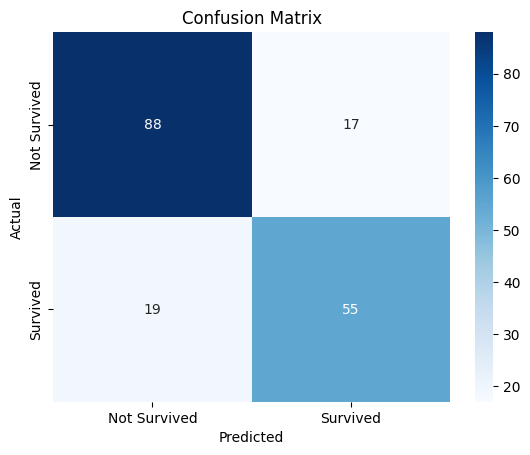

In [107]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False negativess
    
    return TN, FP, FN, TP  

TN, FP, FN, TP = confusion_matrix(y_test, model.predict(X_test))
cm = np.array([[TN, FP], [FN, TP]])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [108]:
def f1_score():
    if TP + FP == 0 or TP + FN == 0:
        return 0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    return 2 * ((precision * recall) / (precision + recall)) if (precision + recall) != 0 else 0


print(f"f1 Score: {f1_score()}")

f1 Score: 0.7534246575342465
